# The Vertex Collection

The `PrimaryVertex` collection contains a list of all the primary vertices in the event. The first one is the Tracking group's pick for the primary vertex.

In [1]:
import matplotlib.pyplot as plt
from config import ds

Found backend type matching "xaod". Matching by type is depreciated. Please switch to using the "name" keyword in your servicex.yaml file.


Fetch all the inner detector tracks and plot their $p_T$ and the radius of the first hit on the tracks.

In [2]:
import logging
logging.basicConfig(level=logging.INFO)
vertices = (ds
            .SelectMany(lambda e: e.Vertices("PrimaryVertices"))
            .Select(lambda v: 
            {
                    "x": v.x(),
                    "y": v.y(),
                    "z": v.z(),
                    "n": v.nTrackParticles()
            })
            .AsAwkwardArray()
            .value())

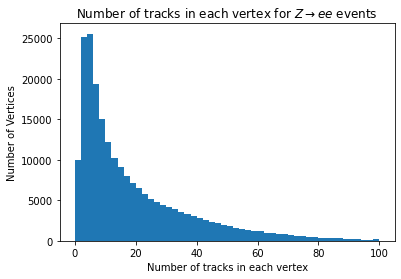

In [3]:
plt.hist(vertices.n, bins=50, range=(0, 100))
plt.xlabel('Number of tracks in each vertex')
plt.ylabel('Number of Vertices')
_ = plt.title('Number of tracks in each vertex for $Z\\rightarrow ee$ events')

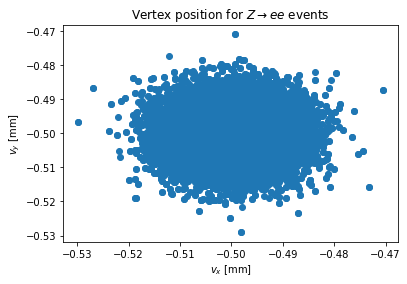

In [4]:
plt.scatter(vertices.x, vertices.y)
plt.xlabel('$v_x$ [mm]')
plt.ylabel("$v_y$ [mm]")
_ = plt.title('Vertex position for $Z\\rightarrow ee$ events')

At the Tevatron you could see the beam tilt. No so much here at the LHC!

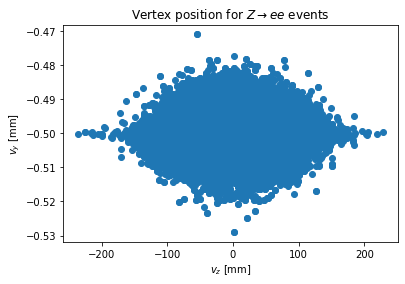

In [5]:
plt.scatter(vertices.z, vertices.y)
plt.xlabel('$v_z$ [mm]')
plt.ylabel("$v_y$ [mm]")
_ = plt.title('Vertex position for $Z\\rightarrow ee$ events')

Normally one wants only the primary vertex - which in ATLAS is the first vertex in the collection.

In [6]:
pvs = (ds
       .Select(lambda e: e.Vertices("PrimaryVertices").First())
       .Select(lambda v:
       {
               "x": v.x(),
               "y": v.y(),
               "z": v.z(),
               "n": v.nTrackParticles(),
       })
       .AsAwkwardArray()
       .value())

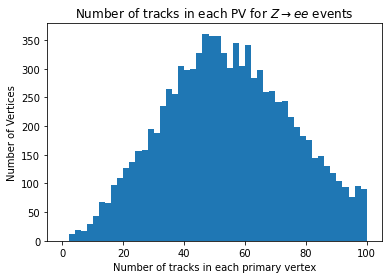

In [7]:
plt.hist(pvs.n, bins=50, range=(0, 100))
plt.xlabel('Number of tracks in each primary vertex')
plt.ylabel('Number of Vertices')
_ = plt.title('Number of tracks in each PV for $Z\\rightarrow ee$ events')

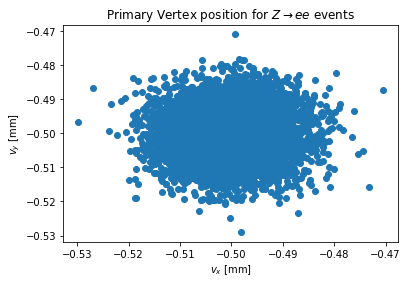

In [8]:
plt.scatter(pvs.x, pvs.y)
plt.xlabel('$v_x$ [mm]')
plt.ylabel("$v_y$ [mm]")
_ = plt.title('Primary Vertex position for $Z\\rightarrow ee$ events')

Note that the wings are gone now in the tilt plot, and the hight is more compressed. The wings were likely beam-gas interactions or similar.

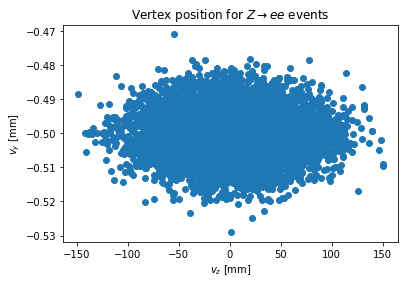

In [9]:
plt.scatter(pvs.z, pvs.y)
plt.xlabel('$v_z$ [mm]')
plt.ylabel("$v_y$ [mm]")
_ = plt.title('Vertex position for $Z\\rightarrow ee$ events')

## The Datamodel

The data model when this documentation was last built was:

In [10]:
from func_adl_servicex_xaodr21.xAOD.trackparticle_v1 import TrackParticle_v1
help(TrackParticle_v1)

Help on class TrackParticle_v1 in module func_adl_servicex_xaodr21.xAOD.trackparticle_v1:

class TrackParticle_v1(builtins.object)
 |  A class
 |  
 |  Methods defined here:
 |  
 |  TrackParticle_v1(self) -> 'func_adl_servicex_xaodr21.xAOD.trackparticle_v1.TrackParticle_v1'
 |      A method
 |  
 |  beamlineTiltX(self) -> 'float'
 |      A method
 |  
 |  beamlineTiltY(self) -> 'float'
 |      A method
 |  
 |  charge(self) -> 'float'
 |      A method
 |  
 |  chiSquared(self) -> 'float'
 |      A method
 |  
 |  clearDecorations(self) -> 'bool'
 |      A method
 |  
 |  d0(self) -> 'float'
 |      A method
 |  
 |  definingParametersCovMatrixVec(self) -> 'func_adl_servicex_xaodr21.vector_float_.vector_float_'
 |      A method
 |  
 |  e(self) -> 'float'
 |      A method
 |  
 |  eta(self) -> 'float'
 |      A method
 |  
 |  hasNonConstStore(self) -> 'bool'
 |      A method
 |  
 |  hasStore(self) -> 'bool'
 |      A method
 |  
 |  hitPattern(self) -> 'int'
 |      A method
 |  
 | 

## Further Information

* The [`xAOD::TrackParticle_v1` C++ header file](https://gitlab.cern.ch/atlas/athena/-/blob/21.2/Event/xAOD/xAODTracking/xAODTracking/versions/TrackParticle_v1.h) with all the inline documentation.
* The [Tracking CP group R21 recommendation pages](https://twiki.cern.ch/twiki/bin/view/AtlasProtected/TrackingCPRecsEarly2018#Track_Selection) on the ATLAS TWiki